# OVERVIEW #

This notebook imports the COVID and Traveler DataFrame exported as .csv in the COVID19_Travel_Create_DataFrames notebook.


In the COVID19_Travel_Create_DataFrames.ipynb file, CDC COVID data and TSA Traveler data was imported from .csv, saved in DataFrames, converted into useful datatypes, and then merged into a single DataFrame.  That DataFrame was then exported as a .csv file.


This notebook presents key questions about the data, creates visualizations using Seaborn, and presents observations.  

In [ ]:
#Import Time, Datetime, MatPlotLib, Seaborn, Pandas, Numpy
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# SECTION 1: Key Questions #

#### Here are key questions explored through this analysis: ####


1. What was 'typical' travel like each month in 2019 and 2020?  


2. What were the COVID trends in 2020 for those same date ranges?  


3. What was the correlation between COVID and travel in the early (March/April), middle (May -July), and late (Aug - Oct) parts of the 'first wave' of COVID 2020?

*Note: the longer term plan is to continue to follow the trend through the end of 2020 and into 2021 as the COVID second wave plays out this Fall/Winter.*

In [3]:
#Import the COVID DataFrame created and saved as .csv in the 'COVID19Travel_Create_DataFrames' notebook

covid_travel = pd.read_csv('covid_travel.csv')

#I've intentionally saved the COVID DataFrame as a .csv and opened it here
    #because I need it to have a standard index, rather than having the dates as the index
    #this is because the dates need to be their own column in order to include them in the charts

In [43]:
#Preview the DataFrame

covid_travel.tail()

,Unnamed: 0,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
194,2020-09-11,20163,188,812,731353.0,2484025.0
195,2020-09-12,18277,100,574,613703.0,1879822.0
196,2020-09-13,15436,154,560,809850.0,2485134.0
197,2020-09-14,25893,163,1031,729558.0,2405832.0
198,2020-09-15,39927,400,1754,522383.0,2013050.0


In [5]:
#Check the datatypes
covid_travel.info()

#The dates column can be renamed and the values re-converted to date datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          199 non-null    object 
 1   Cases                               199 non-null    int64  
 2   Deaths                              199 non-null    int64  
 3   Hospitalizations                    199 non-null    int64  
 4   2020 Traveler Count                 199 non-null    float64
 5   2019 Traveler Count (Same Weekday)  199 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


In [6]:
#Rename the dates column, from 'Unnamed'

covid_df = covid_travel.rename(columns = {"Unnamed: 0": "Date"})
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
0,2020-03-01,233,12,71,2280522.0,2301439.0
1,2020-03-02,161,14,46,2089641.0,2257920.0
2,2020-03-03,224,11,59,1736393.0,1979558.0
3,2020-03-04,217,15,67,1877401.0,2143619.0
4,2020-03-05,253,9,73,2130015.0,2402692.0


In [7]:
#Import the datetime module
import datetime

#Convert the dates in the date column
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

#Check the datatype for each column - the Date column is now datetime
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                199 non-null    datetime64[ns]
 1   Cases                               199 non-null    int64         
 2   Deaths                              199 non-null    int64         
 3   Hospitalizations                    199 non-null    int64         
 4   2020 Traveler Count                 199 non-null    float64       
 5   2019 Traveler Count (Same Weekday)  199 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 9.5 KB


In [8]:
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
0,2020-03-01,233,12,71,2280522.0,2301439.0
1,2020-03-02,161,14,46,2089641.0,2257920.0
2,2020-03-03,224,11,59,1736393.0,1979558.0
3,2020-03-04,217,15,67,1877401.0,2143619.0
4,2020-03-05,253,9,73,2130015.0,2402692.0


In [9]:
#I anticipate that I'll want to create some bins to summarize the data by month 
    #But, datetime data-types cannot be binned with pd.cut()
    #Create a month index (number of the month) for each date first and use that for the bins

#Create a month index for each date and list as a separate column
covid_df["Month_Index"] = pd.DatetimeIndex(covid_df["Date"]).month
 
#Create bins using pd.cut() on the new "Month" column and append them to the DataFrame
month_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
month_labels = ["Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec", "Jan"]
covid_df["Month"] = pd.cut(covid_df["Month_Index"], month_bins, labels=month_labels)

covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday),Month_Index,Month
0,2020-03-01,233,12,71,2280522.0,2301439.0,3,Mar
1,2020-03-02,161,14,46,2089641.0,2257920.0,3,Mar
2,2020-03-03,224,11,59,1736393.0,1979558.0,3,Mar
3,2020-03-04,217,15,67,1877401.0,2143619.0,3,Mar
4,2020-03-05,253,9,73,2130015.0,2402692.0,3,Mar


In [10]:
#And finally, I'll need to pivot the data so that I can plot it 

#Use the pd.melt() method to pivot the traveler counts so that they can be called from the same column
tsa_plots = pd.melt(covid_df, id_vars=['Date'], value_vars=['2020 Traveler Count', '2019 Traveler Count (Same Weekday)'], var_name='Travelers', value_name='Counts')
tsa_plots

,Date,Travelers,Counts
0,2020-03-01,2020 Traveler Count,2280522.0
1,2020-03-02,2020 Traveler Count,2089641.0
2,2020-03-03,2020 Traveler Count,1736393.0
3,2020-03-04,2020 Traveler Count,1877401.0
4,2020-03-05,2020 Traveler Count,2130015.0
...,...,...,...
393,2020-09-11,2019 Traveler Count (Same Weekday),2484025.0
394,2020-09-12,2019 Traveler Count (Same Weekday),1879822.0
395,2020-09-13,2019 Traveler Count (Same Weekday),2485134.0
396,2020-09-14,2019 Traveler Count (Same Weekday),2405832.0


In [11]:
#Use the pd.melt() method to pivot the covid counts so that they can be called from the same column
covid_plots = pd.melt(covid_df, id_vars=['Month'], value_vars=['Cases', 'Deaths', 'Hospitalizations'], var_name='COVID Metrics', value_name='Counts')
covid_plots


,Month,COVID Metrics,Counts
0,Mar,Cases,233
1,Mar,Cases,161
2,Mar,Cases,224
3,Mar,Cases,217
4,Mar,Cases,253
...,...,...,...
592,Sept,Hospitalizations,812
593,Sept,Hospitalizations,574
594,Sept,Hospitalizations,560
595,Sept,Hospitalizations,1031


####**Question 1: What did 2019 and 2020 Airline Travel count look like?**####

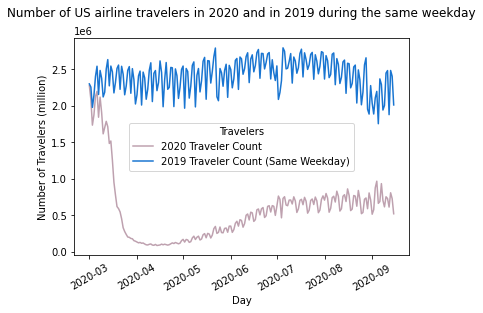

In [12]:
#Display the trend with a lineplot, set line colors using hex codes
hue_colors = {"2020 Traveler Count": "#bea1af", "2019 Traveler Count (Same Weekday)": "#1975d1"}
g = sns.lineplot(x="Date", y="Counts", hue="Travelers", data=tsa_plots, palette=hue_colors)
plt.ylabel("Number of Travelers (million)")
plt.xlabel("Day")
plt.xticks(rotation=30)
g.set_title("Number of US airline travelers in 2020 and in 2019 during the same weekday", y=1.07)
plt.show()


####Observations:#### 
    1. As expected, 2019 traveler numbers were much higher than in 2020. They were fairly consistent across the year.
    2. 2020 traveler numbers dropped dramatically in mid-March and then slowly and steadily rose through the year
    3. However, 2020 traveler numbers remained far lower than 2019 numbers

####**Question 2: What were the COVID trends in 2020 for those same date ranges?**####

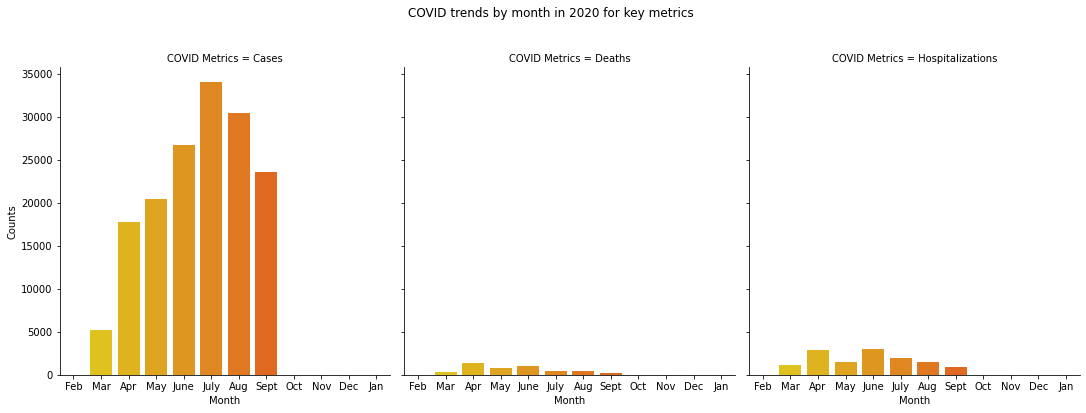

In [13]:
#Create a histogram with subplots to visualize this detail
g = sns.catplot(x="Month", y="Counts", col="COVID Metrics", data=covid_plots, kind="bar", palette="autumn_r", ci=None)
g.fig.suptitle("COVID trends by month in 2020 for key metrics", y=1.10)
plt.show()


####Observations:#### 
    1. Number of cases rose sharply from March to peak in July and then decreased each month
    2. Number of deaths was highest in April with June slightly behind; these numbers were lowest in March and Sept
    3. Number of hospitalizations was highest in April and June also.  From June to Sept they decreased each month

####**Question 3: What was the correlation between COVID stats in the early, mid, and late stages of the first wave of COVID in 2020?**####

    *Early period = March - April (first cases and US lockdown)*
    *Middle period = May - July (re-opening the US was heavily debated, safety measures designed, and much protesting occurred about racial injustice and demands for re-opening)*
    *Late period = Aug - Oct (ending of the first wave, safety measures are in place, back to school began, cold and flu season has not yet begun)*
    *my prediction is that there will be a close correlation in early period, less correlation in mid/late period*

In [59]:
#Create bins to label each period and use pd.cut() on the "Month_Index" column and append them to the DataFrame
period_bins = [1, 5, 8, 11]
period_labels = ["Early First Wave", "Middle First Wave", "Late First Wave"]
                 
covid_df["Wave"] = pd.cut(covid_df["Month_Index"], period_bins, labels=period_labels)

covid_df.head()    

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday),Month_Index,Month,Wave,Scaled 2020 Traveler Count
0,2020-03-01,233,12,71,2280522.0,2301439.0,3,Mar,Early First Wave,22805.22
1,2020-03-02,161,14,46,2089641.0,2257920.0,3,Mar,Early First Wave,20896.41
2,2020-03-03,224,11,59,1736393.0,1979558.0,3,Mar,Early First Wave,17363.93
3,2020-03-04,217,15,67,1877401.0,2143619.0,3,Mar,Early First Wave,18774.01
4,2020-03-05,253,9,73,2130015.0,2402692.0,3,Mar,Early First Wave,21300.15


In [72]:
#Scale down the 2020 Traveler Count by 1,000 so that the numbers can be visualized with COVID case numbers more easily on the chart

covid_df["Scaled 2020 Traveler Count"] = covid_df["2020 Traveler Count"] / 10


In [96]:
#Then pivot the dataframe and select only the colunmns needed for the plot
line_df = pd.melt(covid_df, id_vars=['Month'], value_vars=['Scaled 2020 Traveler Count', 'Cases'], var_name='Comparison', value_name='Counts')
line_df.head()

,Month,Comparison,Counts
0,Mar,Scaled 2020 Traveler Count,228052.2
1,Mar,Scaled 2020 Traveler Count,208964.1
2,Mar,Scaled 2020 Traveler Count,173639.3
3,Mar,Scaled 2020 Traveler Count,187740.1
4,Mar,Scaled 2020 Traveler Count,213001.5


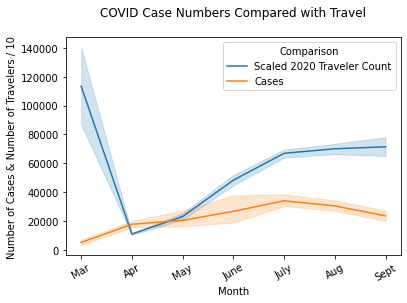

In [97]:
#Display the trend with a lineplot, set line colors using hex codes
g = sns.lineplot(x="Month", y="Counts", hue="Comparison", data=line_df)
plt.ylabel("Number of Cases & Number of Travelers / 10")
plt.xlabel("Month")
plt.xticks(rotation=30)
g.set_title("COVID Case Numbers Compared with Travel", y=1.07)
plt.show()



###**Observations:**###
    1. The number of travelers and the number of COVID cases do not appear to rise and fall in sync with each other.
    2. In fact, the number of COVID cases was highest in July and that was also nearly the highest number of travelers since the drop in travelers in April
    3. However, the number of travelers increased to a smaller degree in July - Sept, while the number of COVID cases declined slightly.  
       This could indicate that travel slowed after the peak in COVID cases in July

In [98]:
#Pivot the COVID dataframe by wave instead of month and select only the colunmns needed for the plot
bar_df = pd.melt(covid_df, id_vars=['Wave'], value_vars=['Scaled 2020 Traveler Count', 'Cases'], var_name='Comparison', value_name='Counts')
bar_df.head()

,Wave,Comparison,Counts
0,Early First Wave,Scaled 2020 Traveler Count,228052.2
1,Early First Wave,Scaled 2020 Traveler Count,208964.1
2,Early First Wave,Scaled 2020 Traveler Count,173639.3
3,Early First Wave,Scaled 2020 Traveler Count,187740.1
4,Early First Wave,Scaled 2020 Traveler Count,213001.5


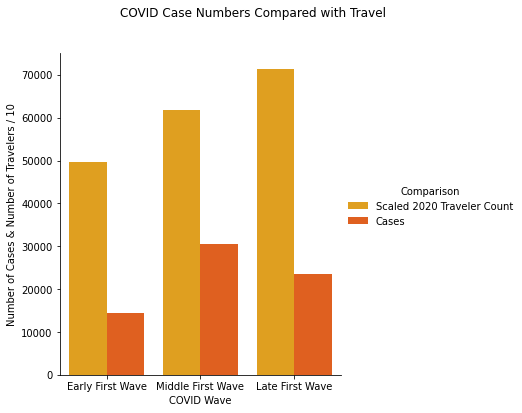

In [102]:
#diplay the same trend, broken into 'Waves' with a bar chart
g = sns.catplot(x="Wave", y="Counts", hue="Comparison", data=bar_df, kind="bar", palette="autumn_r", ci=None)
g.fig.suptitle("COVID Case Numbers Compared with Travel", y=1.10)
g.set_axis_labels("COVID Wave", "Number of Cases & Number of Travelers / 10")
plt.show()


###**Observations:**###
This view of the data further demonstrates that the number of travelers does not follow the same patterns as the number of COVID cases:
    1. Between the early and middle part of the first wave, the number of travelers increased while the number of COVID cases increased also
    2. Between the middle and late part of the first wave, the number of travelers continued to increase, while the number of COVID cases decreased slightly
    3. Overall, between the early and late first wave the number of travelers increased while the number of COVID cases increased then decreased
    